# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from scipy.stats import percentileofscore

In [2]:
way_1 = '/datasets/geo_data_0.csv'
way_2 = 'geo_data_0.csv'

if os.path.exists(way_1):
    df_geo_0 = pd.read_csv(way_1)
elif os.path.exists(way_2):
    df_geo_0 = pd.read_csv(way_2)
else:
    print('there is no file in this path geo_0')

In [3]:
way_1 = '/datasets/geo_data_1.csv'
way_2 = 'geo_data_1.csv'

if os.path.exists(way_1):
    df_geo_1 = pd.read_csv(way_1)
elif os.path.exists(way_2):
    df_geo_1 = pd.read_csv(way_2)
else:
    print('there is no file in this path geo_1')

In [4]:
way_1 = '/datasets/geo_data_2.csv'
way_2 = 'geo_data_2.csv'

if os.path.exists(way_1):
    df_geo_2 = pd.read_csv(way_1)
elif os.path.exists(way_2):
    df_geo_2 = pd.read_csv(way_2)
else:
    print('there is no file in this path geo_2')

Первая локация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>, <AxesSubplot:>]],
      dtype=object)

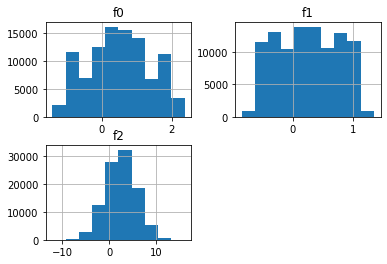

In [5]:
print('Первая локация')
df_geo_0.info(verbose=True)
print(df_geo_0.head())
print(df_geo_0.describe())
print(df_geo_0.corr())
df_geo_0.drop(['product'],axis=1).hist()

Вторая локация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>, <AxesSubplot:>]],
      dtype=object)

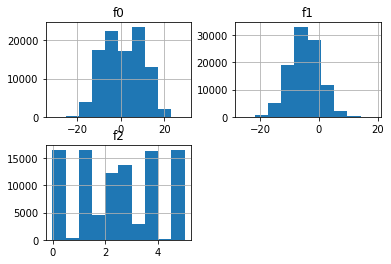

In [6]:
print('Вторая локация')
df_geo_1.info()
print(df_geo_1.head())
print(df_geo_1.describe())
print(df_geo_1.corr())
df_geo_1.drop(['product'],axis=1).hist()

Третья локация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>, <AxesSubplot:>]],
      dtype=object)

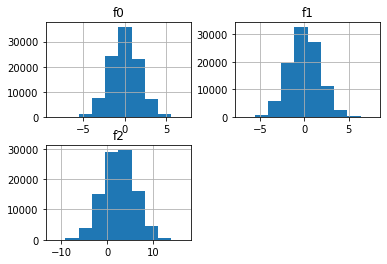

In [7]:
print('Третья локация')
df_geo_2.info()
print(df_geo_2.head())
print(df_geo_2.describe())
print(df_geo_2.corr())
df_geo_2.drop(['product'],axis=1).hist()

In [8]:
print(f'Количество дубликатов в первой локации: {df_geo_0.duplicated().sum()}')
print(f'Количество дубликатов во второй локации: {df_geo_1.duplicated().sum()}')
print(f'Количество дубликатов в третей локации: {df_geo_2.duplicated().sum()}')

Количество дубликатов в первой локации: 0
Количество дубликатов во второй локации: 0
Количество дубликатов в третей локации: 0


явных дублей нет

### Вывод по первому пункту
Данные были подгруженны 
* Месторождения будут не 0 начинаться а с первого (т.е df_geo_0 это первая локация)
* Замеченно что параметр f2 коррелируем с продуктом ( 0.483, 0.999 и 0.445)
* Явных дубликатов не было найденно
* по построинным  гистограмма можно заметить что параметр F1  в  первой локации имеет наибольший разброс, а в третьей наименьший разброс (по данным можно сказать что вторая локация имеет средние параметры между двумя другими локациями(+ параметры распологаються нормальным распределением)) 

## Обучение и проверка модели

In [9]:
df_train_0, df_valid_0 = train_test_split(df_geo_0, test_size=0.25, random_state=12345)
df_train_1, df_valid_1 = train_test_split(df_geo_1, test_size=0.25, random_state=12345)
df_train_2, df_valid_2 = train_test_split(df_geo_2, test_size=0.25, random_state=12345)

feat_train_0 = df_train_0.drop(['id','product'],axis=1)
tar_train_0 = df_train_0['product']
feat_val_0 = df_valid_0.drop(['id','product'],axis=1)
tar_val_0 = df_valid_0['product']

feat_train_1 = df_train_1.drop(['id','product'],axis=1)
tar_train_1 = df_train_1['product']
feat_val_1 = df_valid_1.drop(['id','product'],axis=1)
tar_val_1 = df_valid_1['product']

feat_train_2 = df_train_2.drop(['id','product'],axis=1)
tar_train_2 = df_train_2['product']
feat_val_2 = df_valid_2.drop(['id','product'],axis=1)
tar_val_2 = df_valid_2['product']


In [10]:
model_0 = LinearRegression().fit(feat_train_0,tar_train_0)
pred_0 = model_0.predict(feat_val_0)
rmse_0 = mean_squared_error(tar_val_0,pred_0)**0.5
print(f'Значение RMSE для первой модели: {rmse_0}')
print(f'Являющийся средний запас {tar_val_0.mean():.5} предсказанный запас {pred_0.mean():.5}')

Значение RMSE для первой модели: 37.5794217150813
Являющийся средний запас 92.079 предсказанный запас 92.593


In [11]:
model_1 = LinearRegression().fit(feat_train_1,tar_train_1)
pred_1 = model_1.predict(feat_val_1)
rmse_1 = mean_squared_error(tar_val_1,pred_1)**0.5
print(f'Значение RMSE для второй модели: {rmse_1}')
print(f'Являющийся средний запас {tar_val_1.mean():.5} предсказанный запас {pred_1.mean():.5}')

Значение RMSE для второй модели: 0.893099286775617
Являющийся средний запас 68.723 предсказанный запас 68.729


In [12]:
model_2 = LinearRegression().fit(feat_train_2,tar_train_2)
pred_2 = model_2.predict(feat_val_2)
rmse_2 = mean_squared_error(tar_val_2,pred_2)**0.5
print(f'Значение RMSE для третьей модели: {rmse_2}')
print(f'Являющийся средний запас {tar_val_2.mean():.5} предсказанный запас {pred_2.mean():.5}')

Значение RMSE для третьей модели: 40.02970873393434
Являющийся средний запас 94.884 предсказанный запас 94.965


### Вывод по второму пункту
В данном пункте было:
* Были разбиты данные на тренировочные и валидационные
* обучена модель
* Была расчитана среднеквадратическая ошибка модели (наилучшей являеться у второй модели, так как совершает меньше грубых ошибок)

## Подготовка к расчёту прибыли

In [13]:
col = 200
balance = 10**10/col 
income = 450*10**3
count = balance/income
print(f'Точка безубыточности {count:.4}')
print(f'Объем безубыточного разработки новой скважины в первом месторождени {count-pred_0.mean():.4}')
print(f'Объем безубыточного разработки новой скважины во втором месторождени  {count-pred_1.mean():.4}')
print(f'Объем безубыточного разработки новой скважины в третьем месторождени  {count-pred_2.mean():.4}')


Точка безубыточности 111.1
Объем безубыточного разработки новой скважины в первом месторождени 18.52
Объем безубыточного разработки новой скважины во втором месторождени  42.38
Объем безубыточного разработки новой скважины в третьем месторождени  16.15


### Вывод по третьему пункту
Как видно из точки безубыточности (111.1), в 3 месторождений в среднем по рпедсказанием нету свыше 111.1 баррели, но наибольшее значение показывает второе месторождение.

## Расчёт прибыли и рисков 

In [14]:
def series_type(target, pred):
    target = target.reset_index(drop=True)
    pred = pd.Series(pred)
    return target, pred

In [15]:
tar_val_0, pred_0 = series_type(tar_val_0, pred_0)
tar_val_1, pred_1 = series_type(tar_val_1, pred_1)
tar_val_2, pred_2 = series_type(tar_val_2, pred_2)

In [16]:
def profit(target, predictions, srez=col,inc=income, count=count):
    profit=0
    probs_sorted = predictions.sort_values(ascending=False)[:srez] 
    selected = target[probs_sorted.index][:srez] 
    for top in selected:
        profit+=(top-count)*inc
    return profit

prof_0 = profit(tar_val_0,pred_0)
prof_1 = profit(tar_val_1,pred_1)
prof_2 = profit(tar_val_2,pred_2)

In [17]:
print(f'Прибыль для {col} лучших скважин первого региона {prof_0/10**6:.5} млн. руб.')
print(f'Прибыль для {col} лучших скважин второго региона {prof_1/10**6:.5} млн. руб.')
print(f'Прибыль для {col} лучших скважин третьего региона {prof_2/10**6:.5} млн. руб.')

Прибыль для 200 лучших скважин первого региона 3320.8 млн. руб.
Прибыль для 200 лучших скважин второго региона 2415.1 млн. руб.
Прибыль для 200 лучших скважин третьего региона 2710.3 млн. руб.


In [18]:
# метод получения основных расчётных параметров с помощью будстрепа
def bootstrap(target, predicted, anot=True, out=False ):
    state = RandomState(12345)
    values = []
    for i in range(1000):
        tar_sub_sam = target.sample(n = 500, replace=True, random_state=state)
        pre_sub_sam = predicted[tar_sub_sam.index]
        values.append(profit(tar_sub_sam, pre_sub_sam))
        
    values = pd.Series(values)
    val_mean = values.mean()
    low = values.quantile(q=0.025)
    up = values.quantile(q=0.975)
    risk = percentileofscore(values, 0)
    if anot:
        print('Для данного месторождения следующие показатели:')
        print(f'Средне значение boostrap {round(val_mean/10**6,1)} млн.руб.')
        print('Для 95%-й доверительный интервала')
        print(f'Нижняя граница доверительного интервала {round(low/10**6,3)} млн.руб')
        print(f'Верхняя граница доверительного интервала {round(up/10**6,3)} млн.руб')
        print(f'Риск убытка для данного месторождения {risk}%')
    if out:
        return val_mean, low, up, risk

In [19]:
print("Для первого месторождения")
print("-------------------------")
bootstrap(tar_val_0,pred_0)
print()
print("Для второго месторождения")
print("-------------------------")
bootstrap(tar_val_1,pred_1)
print()
print("Для третьего месторождения")
print("-------------------------")
bootstrap(tar_val_2,pred_2)

Для первого месторождения
-------------------------
Для данного месторождения следующие показатели:
Средне значение boostrap 425.9 млн.руб.
Для 95%-й доверительный интервала
Нижняя граница доверительного интервала -102.09 млн.руб
Верхняя граница доверительного интервала 947.976 млн.руб
Риск убытка для данного месторождения 6.0%

Для второго месторождения
-------------------------
Для данного месторождения следующие показатели:
Средне значение boostrap 515.2 млн.руб.
Для 95%-й доверительный интервала
Нижняя граница доверительного интервала 68.873 млн.руб
Верхняя граница доверительного интервала 931.548 млн.руб
Риск убытка для данного месторождения 1.0%

Для третьего месторождения
-------------------------
Для данного месторождения следующие показатели:
Средне значение boostrap 435.0 млн.руб.
Для 95%-й доверительный интервала
Нижняя граница доверительного интервала -128.881 млн.руб
Верхняя граница доверительного интервала 969.707 млн.руб
Риск убытка для данного месторождения 6.4%


### Вывод
В данной работе была произведенна выгрузка данных просмотренны зависимости, Обучена модель машинного обучения (линейная регрессия) и был прелдставлен прогноз на основе модели для 3 месторождений 

Из данных указанных выше можно заметить что наиболее выгодное месторождения являться второе (geo_data_1) Так как имеет наименьшие риски (1 процент) Наибольшая прибыль и доверительный интервал расположен в наименьшем диапозоне значений, а так же нижняя граница интервал не уходит в отрицательные значения


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован